<div style="float:right; padding-top: 15px; padding-right: 15px">
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="250">
        </a>
    </div>
</div>

# Time Series

_"All analyses related to time ordered data"_

- Properties:
  - Time observations ordered in time
  - Time intervals of same length

- Examples:
  - Public transport occupation
  - Product sales
  - Temperature
  - Stock exchange


## 1. Components

- __Systematic components__: Components of the time series that have consistency or recurrence and can be described and modeled
  - Level: The average value in the series
  - Trend: The increasing or decreasing value in the series
  - Seasonality: The repeating short-term cycle in the series
  
  
- __Non-systematic components__: Components of the time series that cannot be directly modeled
  - Noise: The random variation in the series

### 1.1 Combination of components

- Additive model: 
  - An additive model is linear where changes over time are consistently made by the same amount
  - y(t) = Level + Trend + Seasonality + Noise


- Multiplicative model: 
  - A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time
  - y(t) = Level * Trend * Seasonality * Noise

### 1.2 Example

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/airline-passengers.csv', index_col=0, parse_dates=['Month'])

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


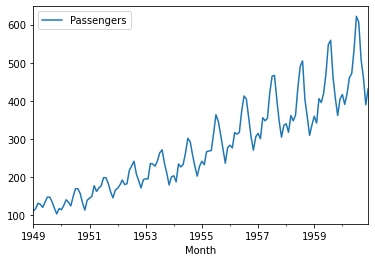

In [5]:
df.plot();

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

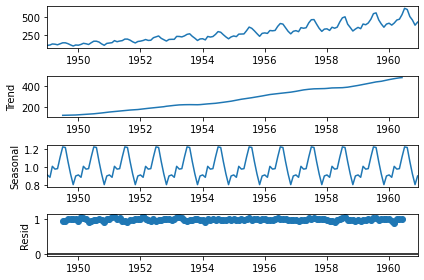

In [9]:
result = seasonal_decompose(df, model='multiplicative')
result.plot();

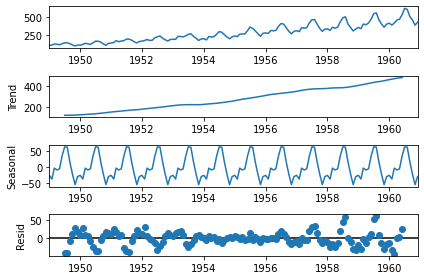

In [10]:
result = seasonal_decompose(df, model='additive')
result.plot();

## 2. Autocorrelation

Statistical correlation summarizes the strength of the relationship between two variables.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

### 2.1 Example

In [12]:
df = pd.read_csv('./data/daily-min-temperatures.csv', index_col=0, parse_dates=['Date'])

df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


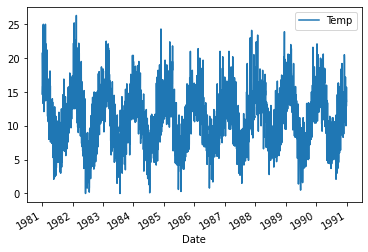

In [13]:
df.plot();

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

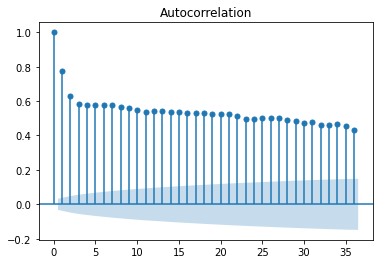

In [15]:
plot_acf(df);

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.

In [16]:
from pandas.plotting import lag_plot

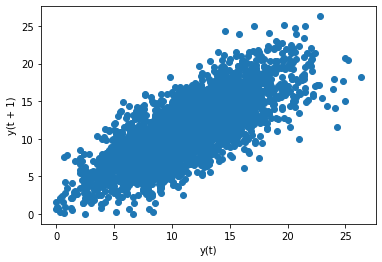

In [17]:
lag_plot(df);

## 3. Stationarity

A time series is considered stationary if its mean and variance do not vary over time. 

To check whether we have a stationary time series, we can either examine the decomposition plot visually, compute the mean and standard deviation over time, or use statistical tests. One possible test is the Augmented Dickey-Fuller test. This test has the following hypothesis:

- H0: The data is not stationary
- H1: The data is stationary



### 3.1 Example

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(df)[1]

0.00024708263003611787

The p-value is smaller than 0.05. Therefore, with a 95% confidence interval, we reject the null hypothesis and conclude that the data is stationary.

## 4. ARIMA

A popular and widely used statistical method for time series forecasting is the ARIMA model.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- __AR__: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations
- __I__: Integrated. The use of differencing of raw observations in order to make the time series stationary
- __MA__: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

- __p__: The number of lag observations included in the model, also called the lag order
- __d__: The number of times that the raw observations are differenced, also called the degree of differencing
- __q__: The size of the moving average window, also called the order of moving average


A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

### 4.1 Example

In [20]:
from datetime import datetime

In [22]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
df = pd.read_csv('./data/shampoo.csv', index_col=0, squeeze=True, parse_dates=[0], date_parser=parser)

df.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

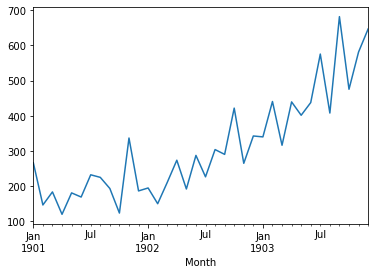

In [23]:
df.plot();

In [24]:
from pandas.plotting import autocorrelation_plot

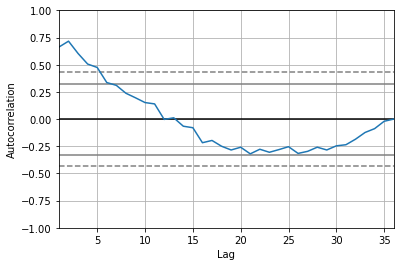

In [25]:
autocorrelation_plot(df);

We can see that there is a positive correlation with the first 10-to-12 lags that seems to be significant for the first 5 lags. Thus, a good starting point for the AR parameter of the model may be 5.

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
test_size = 3

df_train, df_test = df[0:len(df) - test_size], df[len(df) - test_size:]

In [28]:
model = ARIMA(df_train, order=(5,1,4))
model_fit = model.fit()

model_fit.summary()

/home/david/miniconda3/envs/ml_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/david/miniconda3/envs/ml_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   32
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -174.806
Method:                       css-mle   S.D. of innovations             49.021
Date:                Sat, 12 Sep 2020   AIC                            371.612
Time:                        09:52:03   BIC                            387.735
Sample:                    02-01-1901   HQIC                           376.956
                         - 09-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.8330      6.251      1.893      0.058      -0.418      24.084
ar.L1.D.Sales    -0.3870      0.286     -1.351      0.177      -0.948       0.174
ar.L2.D.Sales     0.3634      0.330      1.101      0.271      -0.283       1.010
ar.L3.D.Sales    -0.4042      0.220     -1.840      0.066      -0.835       0.026
ar.L4.D.Sales     0.2071      0.281      0.738      0.461      -0.343       0.757
ar.L5.D.Sales     0.6765      0.223      3.028      0.002       0.239       1.114
ma.L1.D.Sales    -0.7993      0.386     -2.069      0.039      -1.556      -0.042
ma.L2.D.Sales    -0.0047      0.437     -0.011      0.991      -0.860       0.851
ma.L3.D.Sales     1.0175      0.437      2.327      0.020       0.161       1.874
ma.L4.D.Sales    -0.7757      0.378     -2.053      0.040      -1.516      -0.035
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1250           -0.0000j            1.1250           -0.0000
AR.2            0.3116           -1.0308j            1.0769           -0.2033
AR.3            0.3116           +1.0308j            1.0769            0.2033
AR.4           -1.0272           -0.2791j            1.0644           -0.4578
AR.5           -1.0272           +0.2791j            1.0644            0.4578
MA.1           -1.0002           -0.0000j            1.0002           -0.5000
MA.2            0.5116           -0.8592j            1.0000           -0.1645
MA.3            0.5116           +0.8592j            1.0000            0.1645
MA.4            1.2889           -0.0000j            1.2889           -0.0000
-----------------------------------------------------------------------------
"""

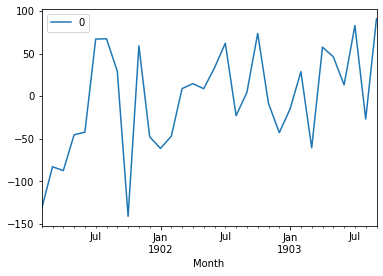

In [29]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot();

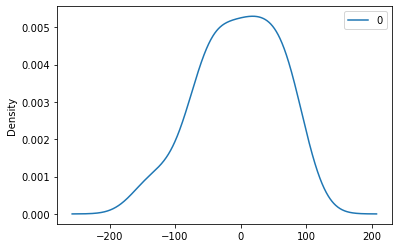

In [30]:
# probability density function
residuals.plot.kde();

In [31]:
residuals.describe()

,0
count,32.000000
mean,-3.610457
std,61.214641
min,-140.956356
25%,-45.756274
50%,6.566155
75%,49.026788
max,90.925279


In [32]:
predictions = model_fit.forecast(test_size)[0]

predictions

array([448.6362949 , 673.94012332, 456.08871315])

In [33]:
for i in range(len(df_test)):
    print(f'Predicted value: {predictions[i]:.1f}, Actual value: {df_test[i]}')

Predicted value: 448.6, Actual value: 475.3
Predicted value: 673.9, Actual value: 581.3
Predicted value: 456.1, Actual value: 646.9


In [34]:
import matplotlib.pyplot as plt

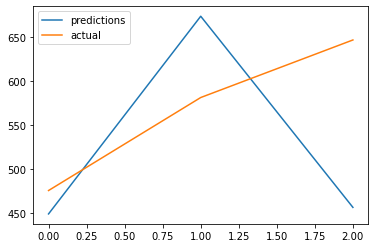

In [35]:
plt.plot(predictions)
plt.plot(df_test.values)
plt.legend(['predictions', 'actual'])

plt.show()

## 5. Exponential Smoothing

Exponential smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic trend or seasonal component

_"Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight"_

## 6. Multivariate Time Series

Neural networks like Long Short-Term Memory (LSTM) recurrent neural networks are able to almost seamlessly model problems with multiple input variables.

This is a great benefit in time series forecasting, where classical linear methods can be difficult to adapt to multivariate or multiple input forecasting problems.

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

<div style="padding-top: 25px; float: right">
    <div>    
        <i>&nbsp;&nbsp;© Copyright by</i>
    </div>
    <div>
        <a href="https://whiteboxml.com">
            <img src="https://whiteboxml.com/static/img/logo/black_bg_white.svg" width="125">
        </a>
    </div>
</div>